In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [5]:
no_bed_rooms = [1,2,3,4,5,6] * 10

In [7]:
len(no_bed_rooms)

60

In [18]:
sq_footage = [400 * x + random.random() * 200 for x in no_bed_rooms]

In [19]:
len(sq_footage)

60

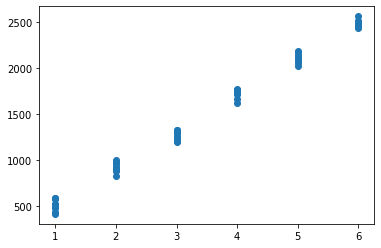

In [20]:
plt.scatter(no_bed_rooms, sq_footage)

In [21]:
def price_map(x1, x2, bias):
    return 100000 * x1 + 100 * x2 + bias

In [22]:
df = pd.DataFrame({"bedrooms": no_bed_rooms, "sqft": sq_footage})

In [24]:
df.head()

,bedrooms,sqft
0,1,503.518269
1,2,889.841372
2,3,1325.522532
3,4,1752.537029
4,5,2142.808594


In [26]:
df["price"] = df.apply(lambda row: price_map(row.bedrooms, row.sqft, 50000), axis=1)

In [27]:
df.head()

,bedrooms,sqft,price
0,1,503.518269,200351.826886
1,2,889.841372,338984.137207
2,3,1325.522532,482552.253169
3,4,1752.537029,625253.702900
4,5,2142.808594,764280.859391


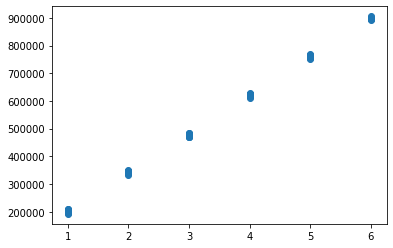

In [28]:
plt.scatter(df.bedrooms, df.price)

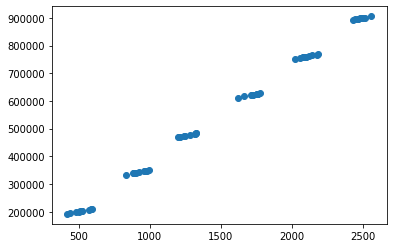

In [29]:
plt.scatter(df.sqft, df.price)

In [32]:
X = df[["bedrooms", "sqft"]]

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
mypca = PCA(n_components=1)

In [44]:
X_with_pca = mypca.fit_transform(X_scaled)

(array([10.,  3.,  7.,  8.,  2.,  5.,  5.,  9.,  1., 10.]),
 array([-2.1368724 , -1.70649544, -1.27611849, -0.84574153, -0.41536457,
         0.01501239,  0.44538934,  0.8757663 ,  1.30614326,  1.73652022,
         2.16689718]),
 <a list of 10 Patch objects>)

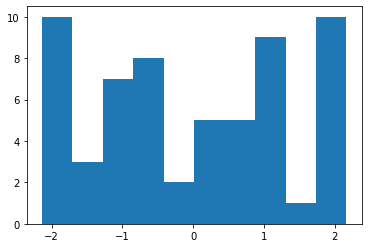

In [46]:
plt.hist(X_with_pca)

In [47]:
mypca.n_components_

1

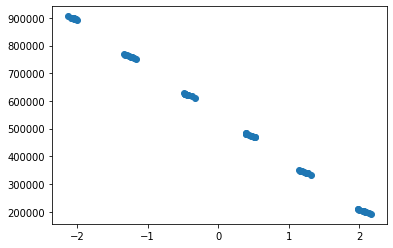

In [48]:
plt.scatter(X_with_pca, df.price)

In [50]:
mypca.explained_variance_ratio_

array([0.99852134])